In [1]:
% matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

import pandas as pd
import numpy as np
import datetime as dt
from ipykernel import kernelapp as app


In [ ]:
# !pwd

In [2]:
healthpath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/climate_related/HeathData/'
# weatherfile = 'NYC_zipcode_asthma_EDvisits_2009_2015.csv' 
# weatherfile = 'NYC_zipcode_asthma_EDvisits_2006_2014.csv'#.xlsx' 
healthfile = 'NYC_boroughs_asthma_EDvisits_2006_2014.csv'#.xlsx' 

# xlsFileio = open(healthpath+healthfile)
# pd.read_excel(healthpath+healthfile)

In [3]:
tmp = pd.read_csv(healthpath+healthfile, na_values=['.','-9999']) #, index_col='Date')
tmp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19716 entries, 0 to 19715
Data columns (total 7 columns):
Date                          19704 non-null object
Borough                       19704 non-null object
Total Count                   19704 non-null float64
Count (Age group 0 - 4)       19704 non-null float64
Count (Age group 5 - 17)      19704 non-null float64
Count (Age group 18 - 64)     19704 non-null float64
Count (Age group 65+)         19704 non-null float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [13]:
tmp.columns = [c.strip().replace(' - ','-').replace(' ','_') for c in tmp.columns]
tmp.columns

Index(['Date', 'Borough', 'Total_Count', 'Count_(Age_group_0-4)',
       'Count_(Age_group_5-17)', 'Count_(Age_group_18-64)',
       'Count_(Age_group_65+)'],
      dtype='object')

In [14]:
# tmp['date'].replace('/','-')
tmp2 = tmp.dropna().reset_index().iloc[:,1:]
tmp2.head()

,Date,Borough,Total_Count,Count_(Age_group_0-4),Count_(Age_group_5-17),Count_(Age_group_18-64),Count_(Age_group_65+)
0,01/01/06,Bronx,75.0,22.0,14.0,33.0,6.0
1,01/01/06,Brooklyn,92.0,32.0,16.0,42.0,2.0
2,01/01/06,Manhattan,43.0,9.0,7.0,23.0,4.0
3,01/01/06,Queens,38.0,14.0,7.0,13.0,4.0
4,01/01/06,Staten Island,7.0,0.0,0.0,1.0,6.0


In [15]:
tmp2['Date'] = [x.replace('/','-') for x in tmp2['Date'].astype(str)]

In [16]:
fmt = '%m-%d-%y'#'%Y-%m-%d' # %Z' # similar to '%m/%d/%y' https://www.tutorialspoint.com/python/time_strptime.htm

In [17]:
tmp2['YR'] = pd.DataFrame([dt.datetime.strptime(d,fmt).year for d in tmp2['Date'].astype(str)] ).astype(int)
tmp2['MTH'] = pd.DataFrame([dt.datetime.strptime(d,fmt).month for d in tmp2['Date'].astype(str)] ).astype(int)
tmp2['DAY'] = pd.DataFrame([dt.datetime.strptime(d,fmt).day for d in tmp2['Date'].astype(str)] ).astype(int)

In [18]:
tmp2['Date'] = [dt.datetime.strptime(d,fmt) for d in tmp2['Date'].astype(str) ]

In [ ]:
# tmp3 = tmp2.iloc[:,1:]
# tmp3.index = tmp2.Date
# tmp3

In [19]:
# ignoreZipCodes
tmp4 = tmp2.groupby(by=['Date','YR','MTH','DAY'],as_index=False).sum()
tmp4.columns
# tmp4.index = 

Index(['Date', 'YR', 'MTH', 'DAY', 'Total_Count', 'Count_(Age_group_0-4)',
       'Count_(Age_group_5-17)', 'Count_(Age_group_18-64)',
       'Count_(Age_group_65+)'],
      dtype='object')

In [20]:
AsthmaEDVisits_summedCounts = tmp4.copy()
AsthmaEDVisits_summedCounts.to_csv(healthpath+'NYCAsthmaEDVisits_summedCounts.csv')

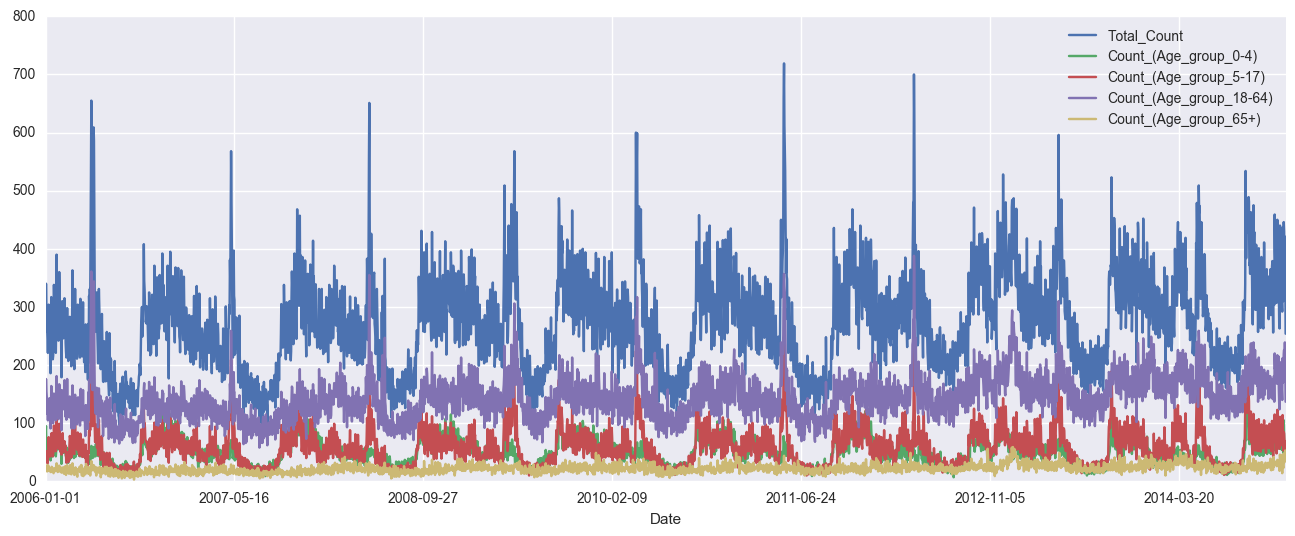

In [21]:
tmp4.plot(y=['Total_Count','Count_(Age_group_0-4)','Count_(Age_group_5-17)', 'Count_(Age_group_18-64)',
       'Count_(Age_group_65+)'],x= tmp4.Date.astype(str), figsize=[16,6]);

([array([ 215.,   97.]), array([ 319.,  475.])], [269.0])

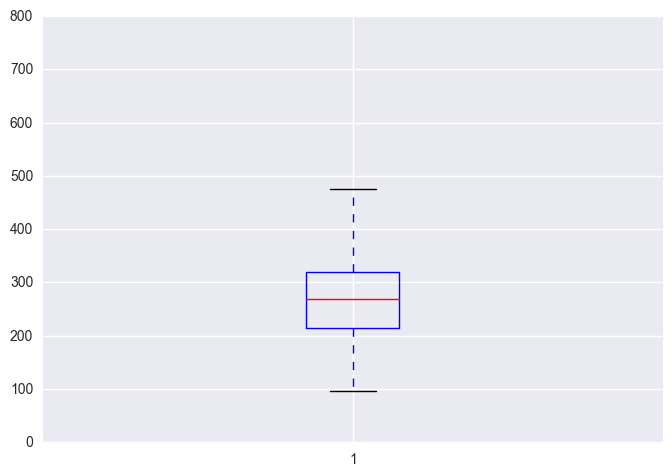

In [57]:
# tmp4.Total_Count.mean(), tmp4.Total_Count.max() 
# tmp4.Total_Count.plot.box();
B=plt.boxplot(tmp4.Total_Count)
[item.get_ydata() for item in B['whiskers']], [item.get_ydata()[0] for item in B['medians']]

(array([   2.,  150.,  491.,  703.,  807.,  630.,  314.,  114.,   47.,   11.]),
 array([  50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.,
         500.,  550.]),
 <a list of 10 Patch objects>)

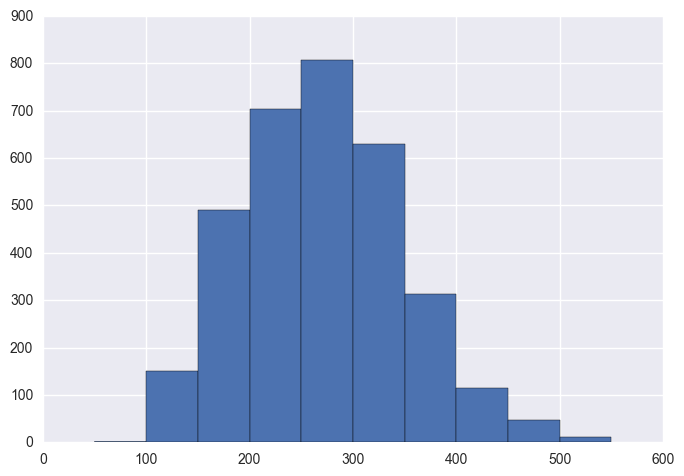

In [94]:
# tmp4.Total_Count.mean() + 4*tmp4.Total_Count.std()
# tmp4.Total_Count.min(), tmp4.Total_Count.max(), 719-97
H = plt.hist(tmp4.Total_Count, bins=10, range=[50,550]);
H

In [116]:
tmp4.Total_Count.median()

269.0

In [124]:
tmp4['Tcount_abvMedian'] = (tmp4.Total_Count>tmp4.Total_Count.median()).astype(int)

In [115]:
bins = np.arange(0,500,50)
# http://stackoverflow.com/questions/31254714/new-python-pandas-dataframe-column-based-on-value-of-variable-using-function

(tmp4['Total_Count'] > bins[0]) & (tmp4['Total_Count'] <= bins[1])
# [
# (tmp4.Total_Count>=bins[0] & tmp4.Total_Count<=bins[1] )

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3254    False
3255    False
3256    False
3257    False
3258    False
3259    False
3260    False
3261    False
3262    False
3263    False
3264    False
3265    False
3266    False
3267    False
3268    False
3269    False
3270    False
3271    False
3272    False
3273    False
3274    False
3275    False
3276    False
3277    False
3278    False
3279    False
3280    False
3281    False
3282    False
3283    False
Name: Total_Count, dtype: bool

In [39]:
tmp4.ix[tmp4.Total_Count.argmax() ]

Date                       2011-05-10 00:00:00
YR                                        2011
MTH                                          5
DAY                                         10
Total_Count                                719
Count_(Age_group_0-4)                       70
Count_(Age_group_5-17)                     248
Count_(Age_group_18-64)                    357
Count_(Age_group_65+)                       44
Name: 1955, dtype: object

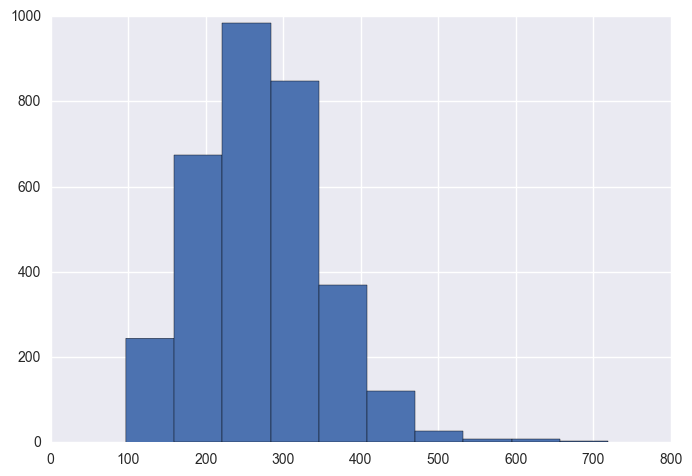

In [64]:
tmp4.Total_Count.hist(bins=10);

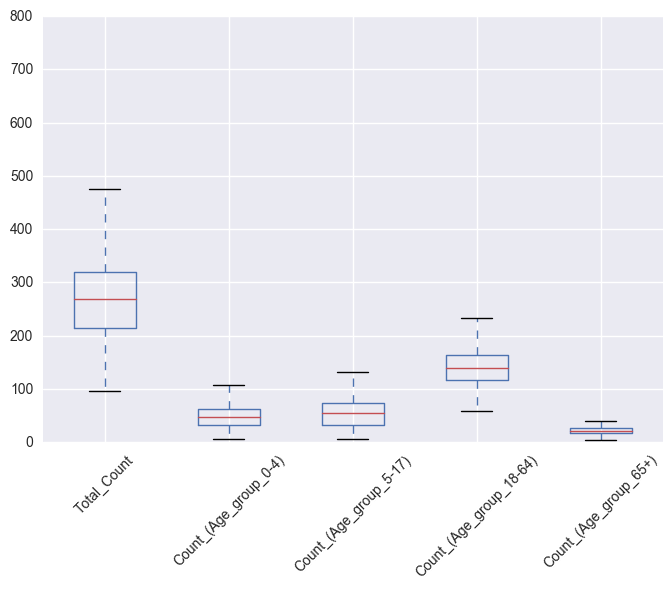

In [23]:
tmp4[['Total_Count','Count_(Age_group_0-4)','Count_(Age_group_5-17)', 'Count_(Age_group_18-64)',
       'Count_(Age_group_65+)']].plot(kind='box', rot=45);

In [25]:
tmp3 = tmp2.iloc[:,1:]
tmp3.index = tmp2.Date
tmp3

,Borough,Total_Count,Count_(Age_group_0-4),Count_(Age_group_5-17),Count_(Age_group_18-64),Count_(Age_group_65+),YR,MTH,DAY
Date,,,,,,,,,
2006-01-01,Bronx,75.0,22.0,14.0,33.0,6.0,2006,1,1
2006-01-01,Brooklyn,92.0,32.0,16.0,42.0,2.0,2006,1,1
2006-01-01,Manhattan,43.0,9.0,7.0,23.0,4.0,2006,1,1
2006-01-01,Queens,38.0,14.0,7.0,13.0,4.0,2006,1,1
2006-01-01,Staten Island,7.0,0.0,0.0,1.0,6.0,2006,1,1
2006-01-01,Unknown,11.0,5.0,2.0,4.0,0.0,2006,1,1
2006-01-02,Bronx,110.0,27.0,17.0,56.0,10.0,2006,1,2
2006-01-02,Brooklyn,121.0,35.0,17.0,59.0,10.0,2006,1,2
2006-01-02,Manhattan,63.0,21.0,6.0,34.0,2.0,2006,1,2


In [ ]:
#ZipCodes
# tmp5 = tmp3.groupby(by=['ZIP_Code','YR','MTH','DAY'],as_index=False).sum()
# tmp5.columns

In [ ]:
# sb.boxplot(tmp5.Total_Count, groupby=tmp4.ZIP_Code);

In [ ]:
# tmp5[tmp5['ZIP_Code']==10010]

In [26]:
tmp5 = tmp3.groupby(by=['Borough','YR','MTH','DAY'],as_index=False).sum()


In [27]:
tmp5.ix[(tmp5['Borough']=='Bronx') | (tmp5['Borough']=='Brooklyn') | (tmp5['Borough']=='Manhattan') | (tmp5['Borough']=='Queens')]

,Borough,YR,MTH,DAY,Total_Count,Count_(Age_group_0-4),Count_(Age_group_5-17),Count_(Age_group_18-64),Count_(Age_group_65+)
0,Bronx,2006,1,1,75.0,22.0,14.0,33.0,6.0
1,Bronx,2006,1,2,110.0,27.0,17.0,56.0,10.0
2,Bronx,2006,1,3,81.0,17.0,16.0,40.0,8.0
3,Bronx,2006,1,4,79.0,20.0,9.0,43.0,7.0
4,Bronx,2006,1,5,87.0,24.0,19.0,38.0,6.0
5,Bronx,2006,1,6,70.0,19.0,6.0,40.0,5.0
6,Bronx,2006,1,7,63.0,11.0,14.0,31.0,7.0
7,Bronx,2006,1,8,66.0,14.0,18.0,29.0,5.0
8,Bronx,2006,1,9,96.0,16.0,26.0,44.0,10.0
9,Bronx,2006,1,10,75.0,12.0,17.0,42.0,4.0


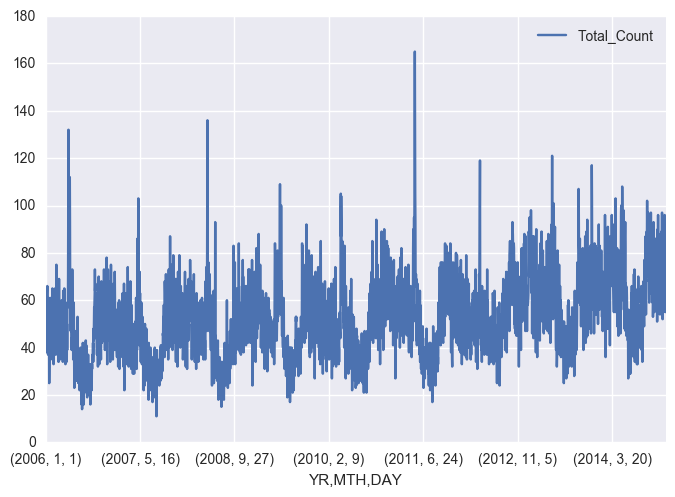

In [28]:
tmp5[tmp5['Borough']=='Manhattan'].plot(x = ['YR','MTH','DAY'] , y='Total_Count');

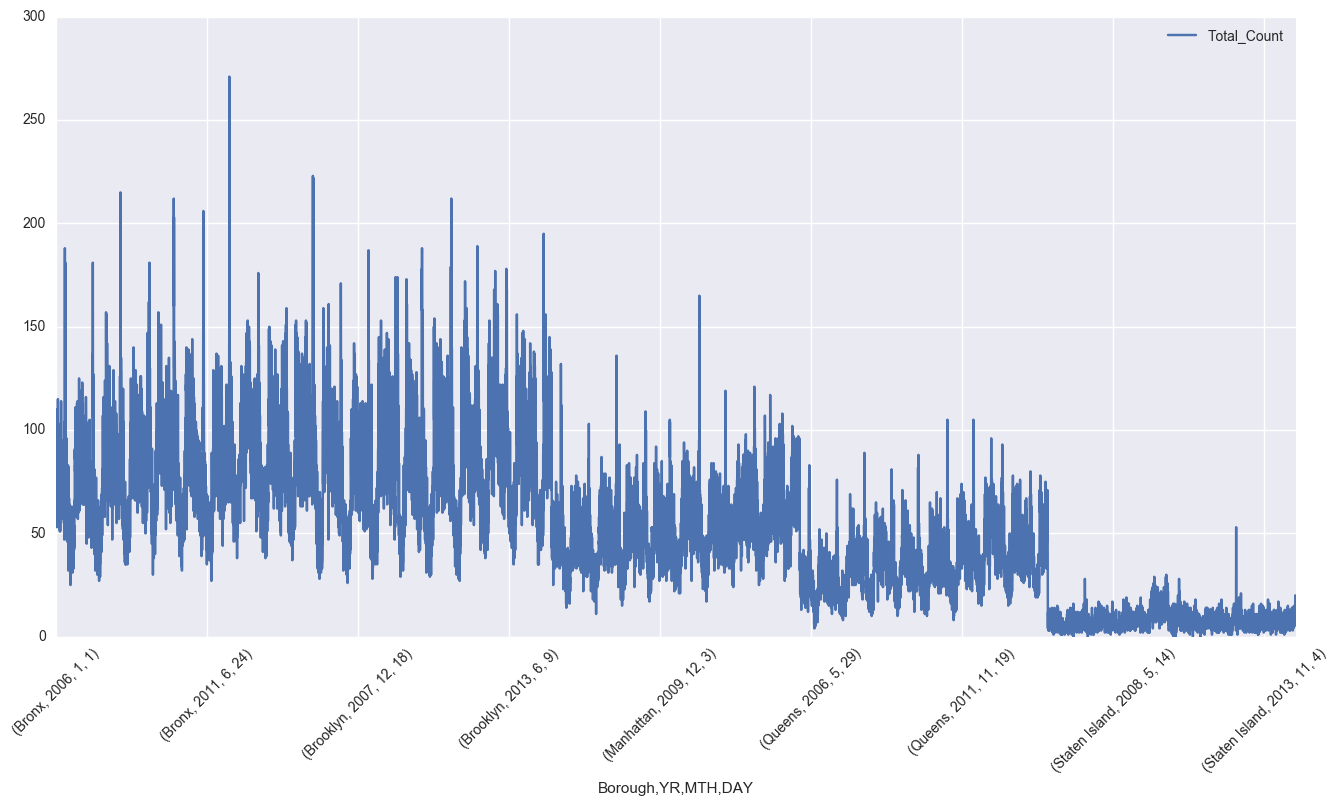

In [29]:
tmp5 = tmp3.groupby(by=['Borough','YR','MTH','DAY'],as_index=False).sum()
tmp5[tmp5['Borough']!='Unknown'].plot(y=['Total_Count', 
#                                          'Count_(Age_group_0-4)',
#        'Count_(Age_group_5-17)', 'Count_(Age_group_18-64)',
#        'Count_(Age_group_65+)'
            ], 
          x=['Borough','YR','MTH','DAY'],
          figsize=[16,8], rot=45);

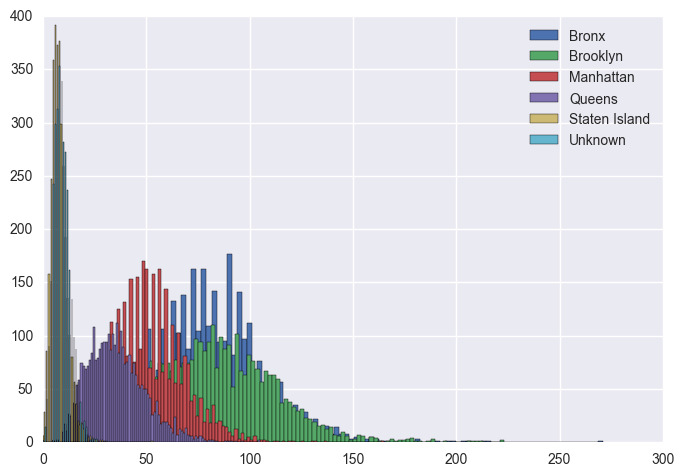

In [30]:
plt.figure()
# plt.subplot()
plt.subplot(1,1,1)
tmp5[tmp5['Borough']=='Bronx'].Total_Count.hist(bins=100);
plt.subplot(1,1,1)
tmp5[tmp5['Borough']=='Brooklyn'].Total_Count.hist(bins=100);
plt.subplot(1,1,1)
tmp5[tmp5['Borough']=='Manhattan'].Total_Count.hist(bins=100);
# plt.figure()
plt.subplot(1,1,1)
tmp5[tmp5['Borough']=='Queens'].Total_Count.hist(bins=100);
plt.subplot(1,1,1)
tmp5[tmp5['Borough']=='Staten Island'].Total_Count.hist(bins=100);
plt.subplot(1,1,1)
tmp5[tmp5['Borough']=='Unknown'].Total_Count.hist(bins=100);
# plt.xlim([0,365]);
plt.legend(list(tmp5.Borough.unique()));

In [31]:
list(tmp5.Borough.unique())

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Unknown']

In [35]:
pd.get_dummies(tmp5.Borough).shape

(19704, 6)

In [32]:
tmp5.Borough.value_counts()

Brooklyn         3284
Unknown          3284
Manhattan        3284
Staten Island    3284
Queens           3284
Bronx            3284
Name: Borough, dtype: int64

In [ ]:
tmp5.shape

In [ ]:
365*11

In [ ]:
tmp6 = tmp5[tmp5['Borough']=='Manhattan'].reset_index()
# .plot(y='Total_Count')
tmp6.index=[tmp6.YR, tmp6.MTH, tmp6.DAY]
tmp6.plot(y=['Total_Count', 'Count_(Age_group_0-4)',
       'Count_(Age_group_5-17)', 'Count_(Age_group_18-64)',
       'Count_(Age_group_65+)'], figsize=[16,8]);

In [ ]:
# tmp2.Date